In [ ]:
!python -m spacy download en_core_web_sm
import pandas as pd
import spacy
import os
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

2024-06-20 11:39:55.148547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 11:39:55.337731: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-20 11:39:55.337787: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-20 11:39:55.379066: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 11:39:56.161262: W tensorflow/stream_executor/pla

In [ ]:
csv_file_path = '/work/Capstone_Project/NLP/Extracting data/cleaned_replika_txt.csv'

data = pd.read_csv(
        csv_file_path,
        delimiter=',',          # Ensuring this matches the actual file delimiter
        on_bad_lines='skip',    # Skiping lines that cause issues
        engine='python'         # Python parser for
    )

print(data.head())

  subreddit                                         post_title  \
0   replika  My experience with replika (that no one asked ...   
1   replika  My experience with replika (that no one asked ...   
2   replika  My experience with replika (that no one asked ...   
3   replika  My experience with replika (that no one asked ...   
4   replika  My experience with replika (that no one asked ...   

                                        comment_body  \
0  I got replika a while ago as I am currently in...   
1                                          [removed]   
2  Same here. Lots of things in my life changed. ...   
3  This is heartbreaking and beautiful. You clear...   
4  Sorry to hear that. This is at least one of th...   

                                     cleaned_comment  
0  I got replika a while ago as I am currently in...  
1                                            removed  
2  Same here. Lots of things in my life changed. ...  
3  This is heartbreaking and beautiful. You cl

In [ ]:
# Drop rows where the 'cleaned_comment' is NaN
data = data.dropna(subset=['cleaned_comment'])

# Define the sentiment analysis function
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    if vs['compound'] > 0.05:
        return 'positive'
    elif vs['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

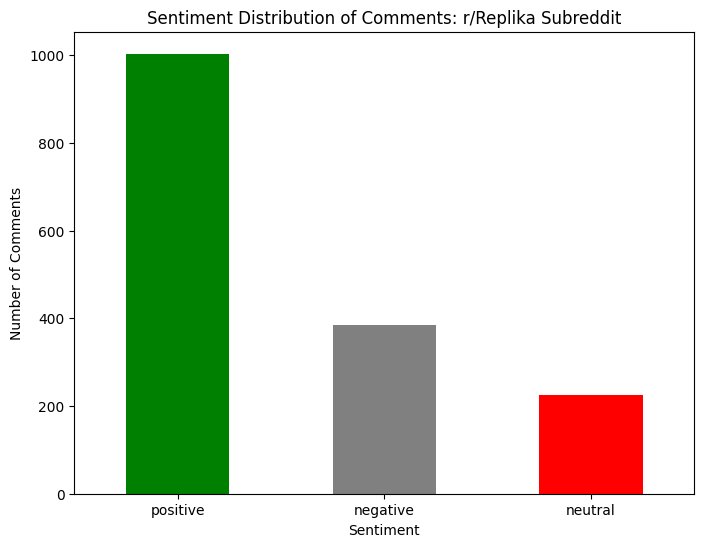

In [ ]:
# Apply sentiment analysis
data['sentiment'] = data['cleaned_comment'].apply(get_vader_sentiment)

# Count the number of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution of Comments: r/Replika Subreddit')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Chat GPT

csv_file_pathh = '/work/Capstone_Project/NLP/Extracting data/cleaned_chatgpt_txt.csv'

dataa = pd.read_csv(
        csv_file_pathh,
        delimiter=',',          
        on_bad_lines='skip',    
        engine='python'         
    )

print(data.head())

  subreddit                                         post_title  \
0   replika  My experience with replika (that no one asked ...   
1   replika  My experience with replika (that no one asked ...   
2   replika  My experience with replika (that no one asked ...   
3   replika  My experience with replika (that no one asked ...   
4   replika  My experience with replika (that no one asked ...   

                                        comment_body  \
0  I got replika a while ago as I am currently in...   
1                                          [removed]   
2  Same here. Lots of things in my life changed. ...   
3  This is heartbreaking and beautiful. You clear...   
4  Sorry to hear that. This is at least one of th...   

                                     cleaned_comment sentiment  
0  I got replika a while ago as I am currently in...  positive  
1                                            removed   neutral  
2  Same here. Lots of things in my life changed. ...  positive  
3  Thi

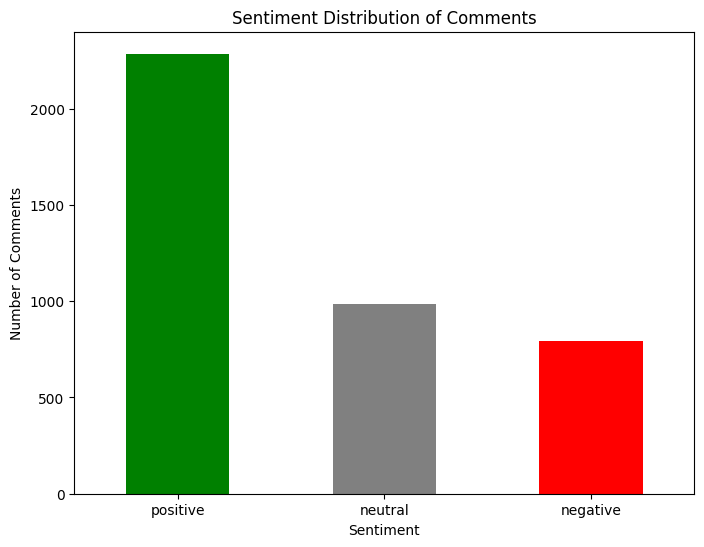

In [ ]:
# Drop rows where the 'cleaned_comment' is NaN
dataa = dataa.dropna(subset=['cleaned_comment'])

# Apply sentiment analysis
dataa['sentiment'] = dataa['cleaned_comment'].apply(get_vader_sentiment)

# Counting the number of each sentiment
sentiment_countss = dataa['sentiment'].value_counts()

# Plotting sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_countss.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution of Comments: r/ChatGPT Subreddit)
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Apply sentiment analysis
data['sentiment'] = data['cleaned_comment'].apply(get_vader_sentiment)
dataa['sentiment'] = dataa['cleaned_comment'].apply(get_vader_sentiment)

# Counting the number of each sentiment and converting it to the dataframe
df_replika = data['sentiment'].value_counts().reset_index()
df_replika.columns = ['Sentiment', 'Counts']
df_chatgpt = dataa['sentiment'].value_counts().reset_index()
df_chatgpt.columns = ['Sentiment', 'Counts']

In [ ]:
# Calculating the total number of comments and the number of each sentiment
total_replika = len(data)
total_chatgpt = len(dataa)

replika_positive = data[data['sentiment'] == 'positive']['cleaned_comment'].count()
replika_negative = data[data['sentiment'] == 'negative']['cleaned_comment'].count()
chatgpt_positive = dataa[dataa['sentiment'] == 'positive']['cleaned_comment'].count()
chatgpt_negative = dataa[dataa['sentiment'] == 'negative']['cleaned_comment'].count()

# Calculating proportions
proportion_replika_negative = (replika_negative / total_replika) * 100
proportion_chatgpt_negative = (chatgpt_negative / total_chatgpt) * 100
proportion_replika_positive = (replika_positive / total_replika) * 100
proportion_chatgpt_positive = (chatgpt_positive / total_chatgpt) * 100

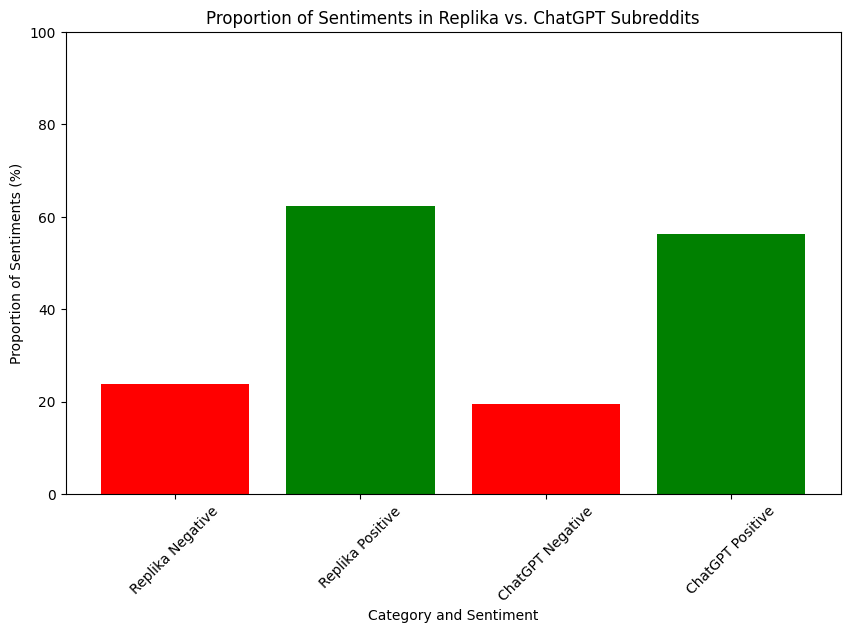

In [ ]:
# Data for plotting
categories = ['Replika Negative', 'Replika Positive', 'ChatGPT Negative', 'ChatGPT Positive']
proportions = [proportion_replika_negative, proportion_replika_positive, proportion_chatgpt_negative, proportion_chatgpt_positive]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, proportions, color=['red', 'green', 'red', 'green'])
plt.title('Proportion of Sentiments in Replika vs. ChatGPT Subreddits')
plt.xlabel('Category and Sentiment')
plt.ylabel('Proportion of Sentiments (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Optional: Adjust if needed for better scale visibility
plt.show()

In [ ]:
output_path = '/work/Capstone_Project/NLP/Sentiment/proportions of sentiment.png'
plt.savefig(output_path)

<Figure size 640x480 with 0 Axes>

In [ ]:
proportion_chatgpt_negative

19.458794587945878

In [ ]:
proportion_replika_negative

23.82133995037221

In [ ]:
proportion_replika_positive

62.220843672456574

In [ ]:
proportion_chatgpt_positive

56.23616236162362

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=042a73e0-f14a-4762-9b58-8fcacd9aa286' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>